In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [72]:
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [73]:
# Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [74]:
# How big is the dataset?
df.shape

(354, 4)

In [75]:
# Top 5 rows
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [76]:
# Are the any duplicate value in the dataset
df.duplicated().sum()

np.int64(0)

In [77]:
# Are there any null value in the dataset
df.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [78]:
# How does the data look like mathematically
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [79]:
# Preprocess the data
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

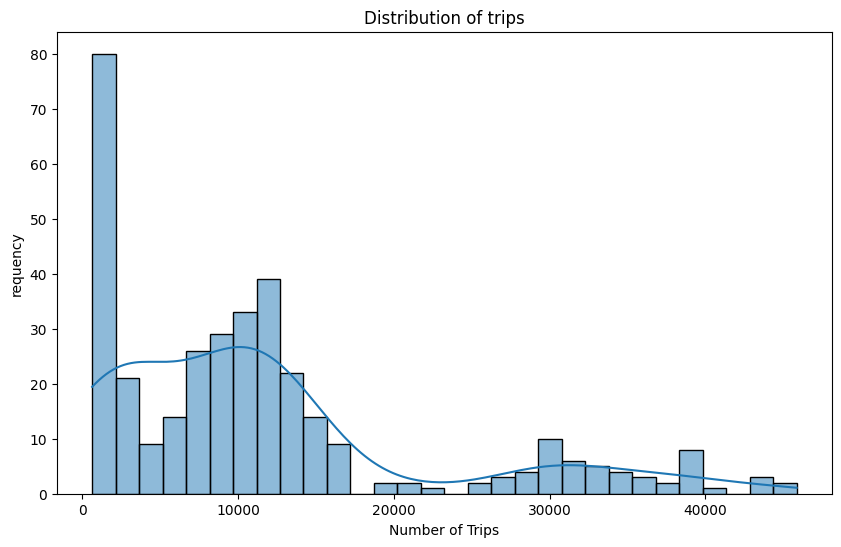

In [80]:
# Visualize the distribution of 'trips'
plt.figure(figsize=(10,6))
sns.histplot(df['trips'], bins = 30, kde = True)
plt.title('Distribution of trips')
plt.xlabel('Number of Trips')
plt.ylabel('requency')
plt.show()

In [81]:
# convert the dispatching_base_number in numeric
le = LabelEncoder()
df['dispatching_base_number'] = le.fit_transform(df['dispatching_base_number'])

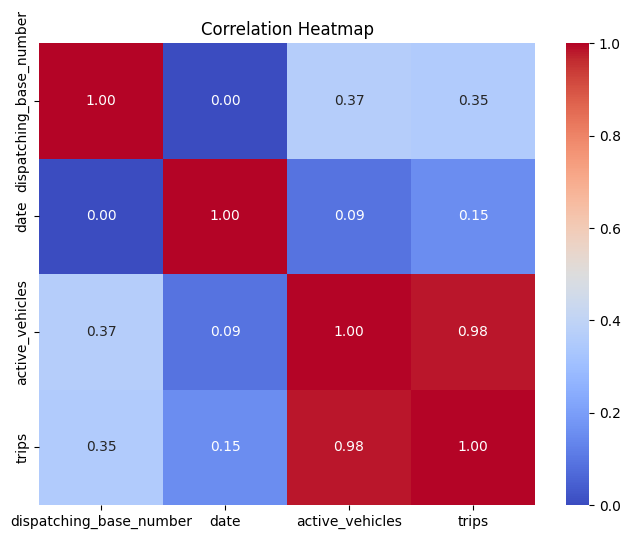

In [82]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [87]:
# Extract features and target variable
# Here, we will predict 'trips' based on 'active_vehicles' and 'dispatching_base_number'
x = df[['active_vehicles']]
y = df['trips']

In [88]:
# split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [89]:
# create a model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [90]:
# fit the model to the training data
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Make Prediction on the test set
y_pred = model.predict(x_test)

In [92]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [93]:
# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 5617775.980422676
R^2 Score: 0.9479013678069232


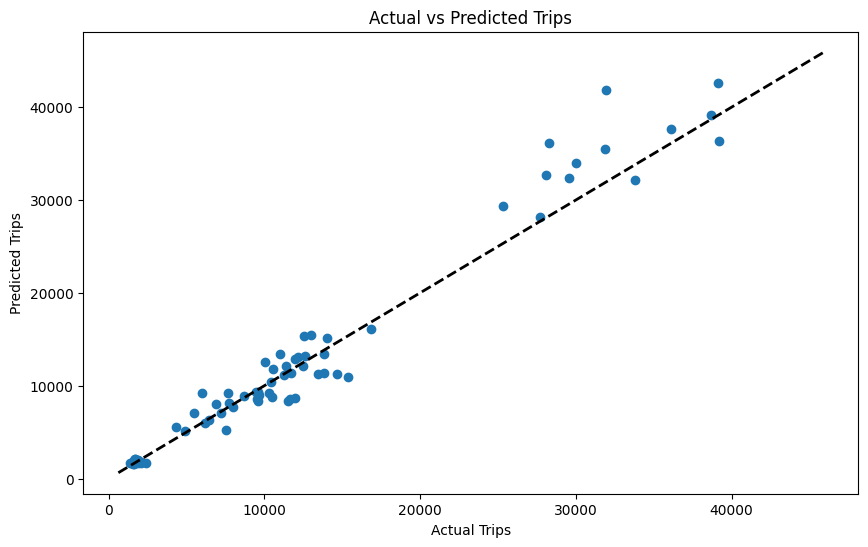

In [94]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()

In [96]:
# XGBoost Implementation
import xgboost as xgb

In [97]:
# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [99]:
# fit the model to the training data
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [101]:
# Make prediction on the test set
y_pred_xgb = xgb_model.predict(x_test)

In [102]:
# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

In [103]:
# Print the evalution matrics
print(f'Mean Squared Error (XGBoost): {xgb_mse}')
print(f'R^2 Score (XGBoost): {xgb_r2}')

Mean Squared Error (XGBoost): 5617775.980422676
R^2 Score (XGBoost): 0.9479013678069232


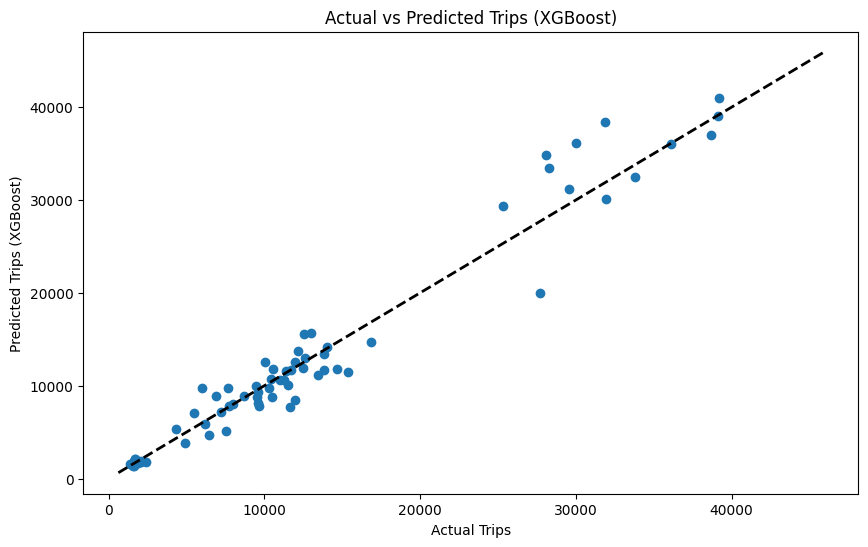

In [104]:
# Visualize the predictions vs actual values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips (XGBoost)')
plt.title('Actual vs Predicted Trips (XGBoost)')
plt.show()